# My Business Issue

### With the rise of streaming services being the new normal it's easy to start drowning in apps and monthly payments just to have some entertainment. Now, with the ever growing list of streaming apps, it’s become overwhelming to have so many platforms at one time. I want to analyze the data of the TV shows on streaming services to see which platform, or combination of platforms, is best suited based on customer interest and overall popularity.


## I am using the Web Series: Ultimate Collection from Kaggle

https://www.kaggle.com/datasets/amritvirsinghx/web-series-ultimate-edition

## I chose this dataset because it seems to have the most data for the questions I'm trying to answer. So many other datasets I found were mostly just one Streaming Service and when I went to see if I could join multiple tables a lot of the data was not compatable and would've mad the data skewed or harder to analyze.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb 
from matplotlib import style

tv_df = pd.read_csv('/Users/jordy/OneDrive/Desktop/Women+/All_Streaming_Shows.csv')

In [4]:
tv_df.head(10)

,Series Title,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform
0,Breaking Bad,2008,18+,9.5,100,"Crime,Drama","When Walter White, a New Mexico chemistry teac...",5Seasons,Netflix
1,Game of Thrones,2011,18+,9.3,99,"Action & Adventure,Drama",Seven noble families fight for control of the ...,8Seasons,"HBO MAX,HBO"
2,Rick and Morty,2013,18+,9.2,97,"Animation,Comedy",Rick is a mentally-unbalanced but scientifical...,4Seasons,"Free Services,HBO MAX,Hulu"
3,Stranger Things,2016,16+,8.8,96,"Drama,Fantasy","When a young boy vanishes, a small town uncove...",3Seasons,Netflix
4,The Boys,2019,18+,8.7,95,"Action & Adventure,Comedy",A group of vigilantes known informally as “The...,2Seasons,Prime Video
5,Dark,2017,16+,8.8,95,"Crime,Drama",A missing child causes four families to help e...,3Seasons,Netflix
6,Chernobyl,2019,18+,9.4,95,"Drama,History",The true story of one of the worst man-made ca...,1Season,"HBO MAX,HBO"
7,Sherlock,2010,16+,9.1,94,"Action & Adventure,Crime",A modern update finds the famous sleuth and hi...,4Seasons,Netflix
8,Fargo,2014,18+,8.9,94,"Crime,Drama",A close-knit anthology series dealing with sto...,3Seasons,Hulu
9,Avatar: The Last Airbender,2005,7+,9.2,94,"Action & Adventure,Animation","In a war-torn world of elemental magic, a youn...",3Seasons,"Netflix,CBS All Access,Hoopla"


# EDA

## One of the challenges I ran into during my EDA was the amount of null values in the Content Rating, IMDB Rating, and Streaming Platform columns.

In [5]:
tv_df.isna().sum()

Series Title             0
Year Released            0
Content Rating        5121
IMDB Rating           2146
R Rating                 0
Genre                    0
Description              0
No of Seasons            0
Streaming Platform    1983
dtype: int64

## Another major finding was how many unique values were in the Genre and Streaming Platform columns due to some Titles belonging to multiple of those values.

In [6]:
pd.unique(tv_df['Streaming Platform'])

array(['Netflix', 'HBO MAX,HBO', 'Free Services,HBO MAX,Hulu',
       'Prime Video', 'Hulu', 'Netflix,CBS All Access,Hoopla',
       'HBO MAX,Hulu,TBS', 'Netflix,Comedy Central,fuboTV',
       'Free Services,Netflix,TNT', 'Free Services,Netflix,Hulu',
       'Free Services,Prime Video,NBC', 'Prime Video,USA,fuboTV',
       'Free Services,Netflix,YouTube Premium', 'Free Services,Hulu,FX',
       'Disney+', 'Prime Video,Hulu', 'Netflix,AMC,fuboTV',
       'Free Services,Hulu', 'Free Services,Hulu,TBS',
       'Free Services,Netflix,Showtime',
       'Free Services,Netflix,Prime Video', 'Free Services,Netflix',
       'Free Services', 'Netflix,Showtime,fuboTV',
       'Free Services,Hulu,ABC', 'Free Services,Prime Video',
       'Hulu,FX,Viceland', 'Netflix,Showtime,Hulu', 'Hulu,TBS,fuboTV',
       'Free Services,Netflix,HBO MAX',
       'Free Services,Prime Video,BritBox',
       'Free Services,Showtime,fuboTV', 'Free Services,Netflix,fuboTV',
       'Free Services,Hulu,Crunchyroll', 'Ne

In [7]:
pd.unique(tv_df['Genre'])

array(['Crime,Drama', 'Action & Adventure,Drama', 'Animation,Comedy',
       'Drama,Fantasy', 'Action & Adventure,Comedy', 'Drama,History',
       'Action & Adventure,Crime', 'Action & Adventure,Animation',
       'Comedy,Romance', 'Comedy,2005', 'Comedy,Crime',
       'Action & Adventure,Anime', 'Drama,Science-Fiction',
       'Drama,Mystery', 'Fantasy,Crime', 'Thriller,Action & Adventure',
       'Drama,Thriller', 'Action & Adventure,Science-Fiction',
       'Drama,Horror', 'Comedy,LGBTQ', 'Comedy,2009', 'Drama,2007',
       'Comedy,Drama', 'Drama,Comedy', 'Documentary,Biography',
       'Comedy,Stand-up & Talk', 'Horror,Drama',
       'Drama,Action & Adventure', 'Drama,Romance', 'Drama,Sport',
       'Thriller,Biography', 'Science-Fiction,Animation', 'Comedy,2003',
       'Action & Adventure,Thriller', 'Thriller,LGBTQ', 'Comedy,2014',
       'Drama,2018', 'Drama,LGBTQ', 'Drama,Crime',
       'Action & Adventure,Fantasy', 'Comedy,2000', 'Biography,Drama',
       'Action & Adventure,H

## Because of this, it was hard to get an idea of the popular Genres and Streaming Platforms before I clean it up, since those are the most important columns for my analysis I decided to use word clouds.

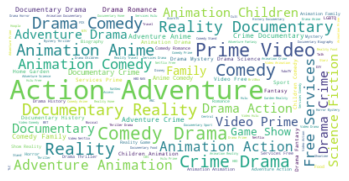

In [8]:
from wordcloud import WordCloud, STOPWORDS

fig3 = " ".join(review for review in tv_df.Genre.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', max_words = 200, stopwords = stopwords)

wordcloud.generate(fig3)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

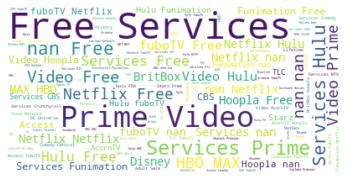

In [11]:
from wordcloud import WordCloud, STOPWORDS

tv_df_viz = tv_df.rename(columns={'Streaming Platform': 'StreamingPlatform'})

fig4 = " ".join(review for review in tv_df_viz.StreamingPlatform.astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', max_words = 200, stopwords = stopwords)

wordcloud.generate(fig4)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## "Free Services" are streaming platforms that don't require a monthly payment, so I decided not to use that in my analysis since my main focus is on the ones that do and there is still enough data without it.

#

# Cleaning Data

## I noticed there were a lot of values imputed with "-1" 

In [13]:
tv_df['Genre'].value_counts()['-1']

479

In [14]:
tv_df['Streaming Platform'].value_counts()["-1"]

479

## I used this code to remove the instances of "-1"

In [17]:
tv_df_dropped_missing = tv_df[(tv_df['Streaming Platform'] != '-1') & (tv_df['No of Seasons'] != '-1') & (tv_df['Description'] != '-1') & (tv_df['Genre'] != '-1') & (tv_df['R Rating'] != -1)]


## Going back to the Genre and Streaming Platform columns where there were multiple values separated by comma I decided to split those up and made them into new columns

## Genre Column

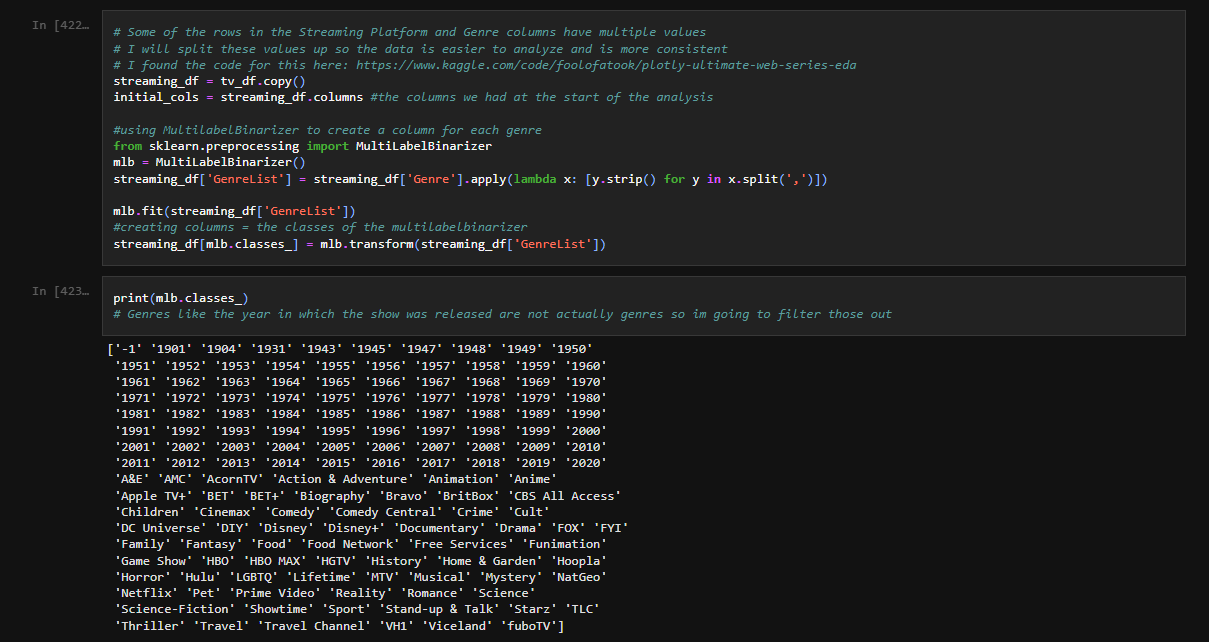

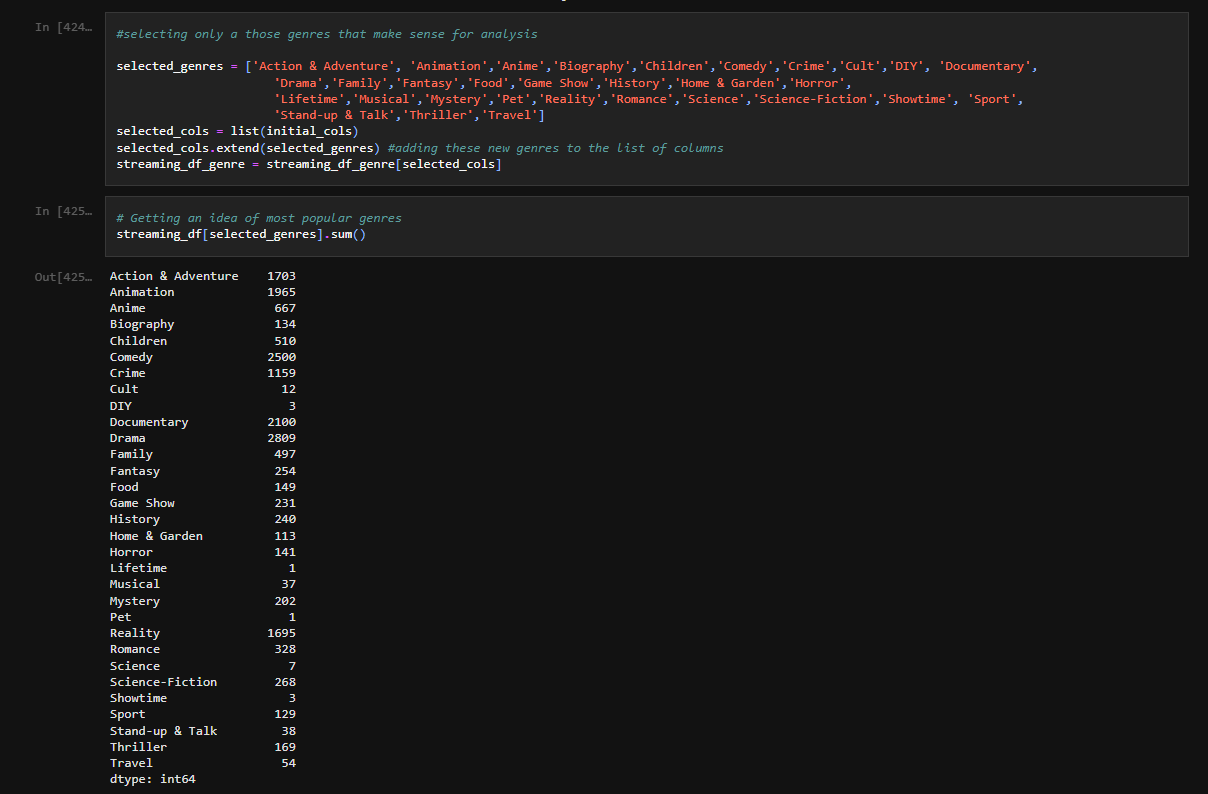

## Streaming Platform Column

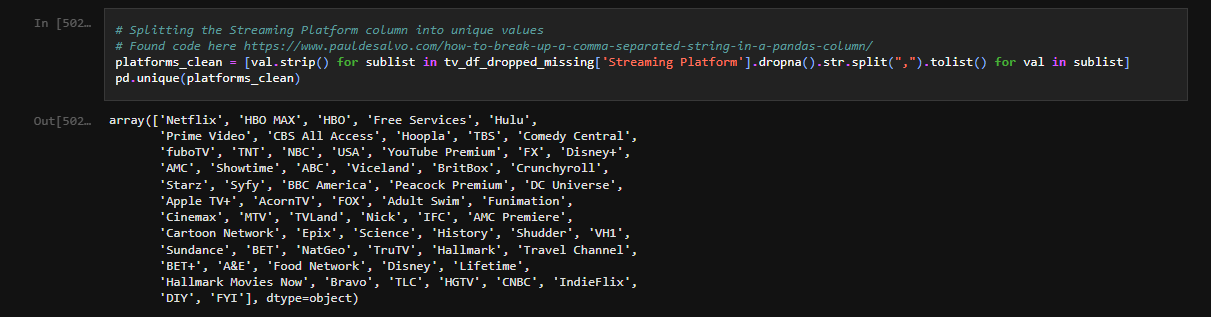